In [34]:
import pandas as pd

In [35]:
sms = pd.read_csv("spam.csv", encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [44]:
sms.shape

(5572, 3)

In [37]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [38]:
sms = sms.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
sms.columns = ['label', 'message']
sms.to_csv('preprocessed_sms.csv', index=False)

In [39]:
print(sms.isnull().sum())

label      0
message    0
dtype: int64


In [40]:
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [45]:
ham=sms[sms["label"]=="ham"]
spam=sms[sms["label"]=="spam"]
ham.shape,spam.shape

((4825, 3), (747, 3))

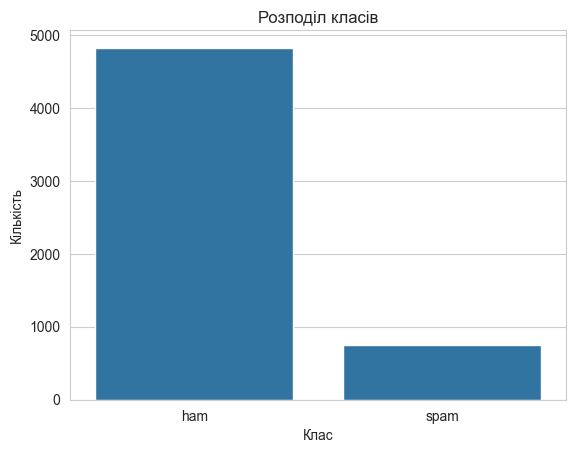

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=sms)
plt.title('Розподіл класів')
plt.xlabel('Клас')
plt.ylabel('Кількість')
plt.show()

In [42]:
sms['length'] = sms['message'].apply(len)

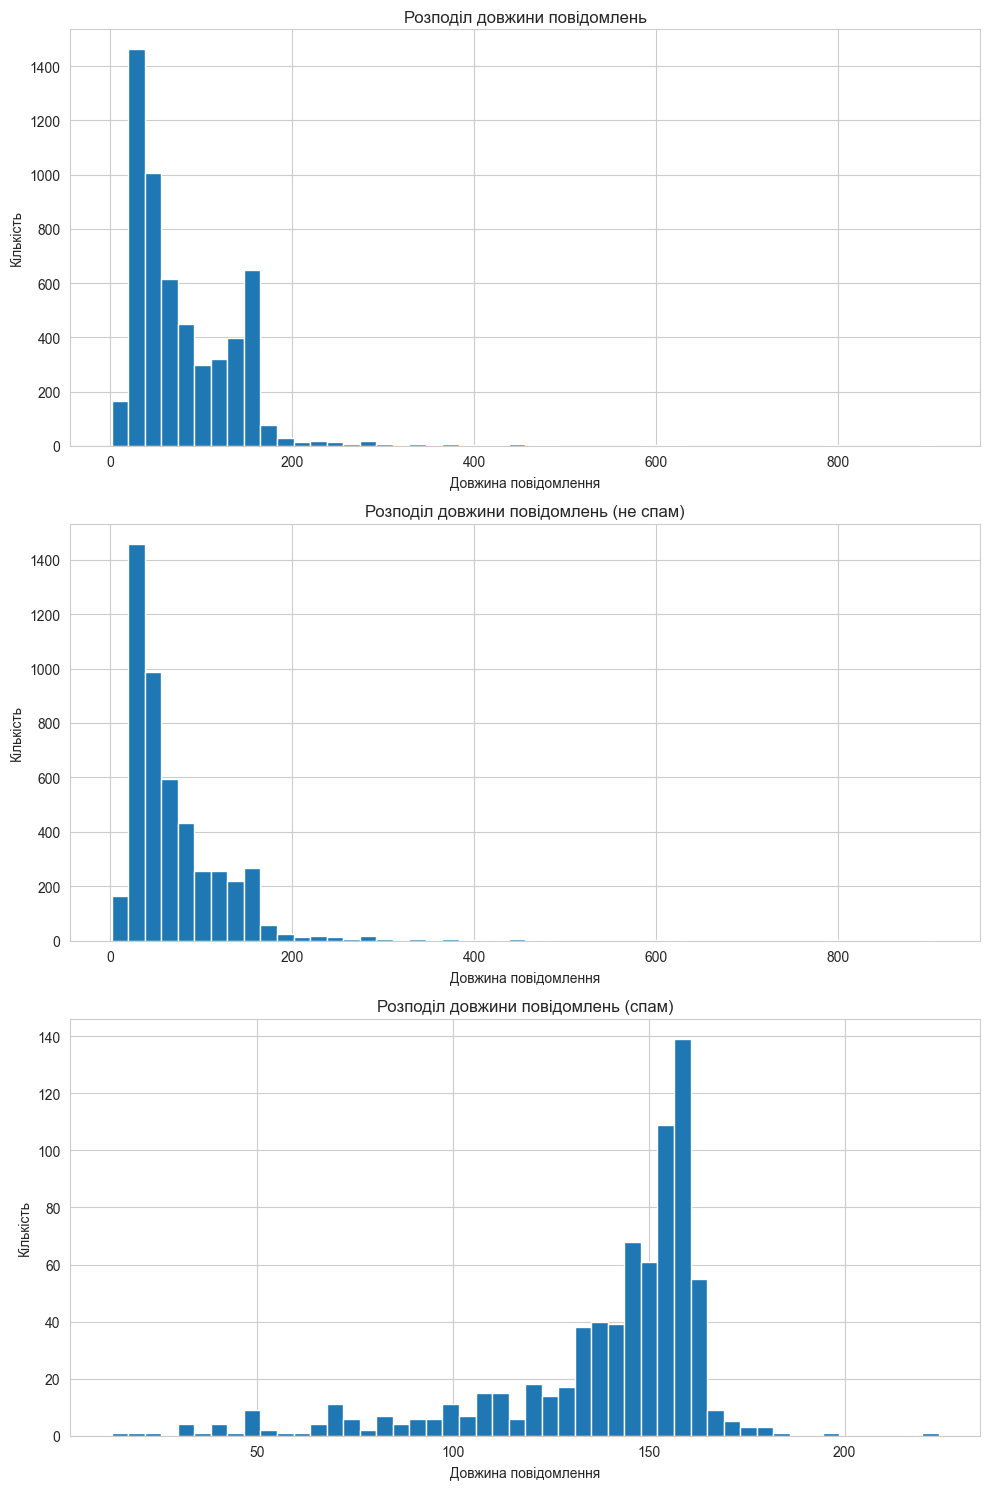

In [43]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

sms['length'].plot(bins=50, kind='hist', ax=axes[0])
axes[0].set_title('Розподіл довжини повідомлень')
axes[0].set_xlabel('Довжина повідомлення')
axes[0].set_ylabel('Кількість')

sms[sms['label'] == 'ham']['length'].plot(bins=50, kind='hist', ax=axes[1])
axes[1].set_title('Розподіл довжини повідомлень (не спам)')
axes[1].set_xlabel('Довжина повідомлення')
axes[1].set_ylabel('Кількість')

sms[sms['label'] == 'spam']['length'].plot(bins=50, kind='hist', ax=axes[2])
axes[2].set_title('Розподіл довжини повідомлень (спам)')
axes[2].set_xlabel('Довжина повідомлення')
axes[2].set_ylabel('Кількість')

plt.tight_layout()
plt.show()

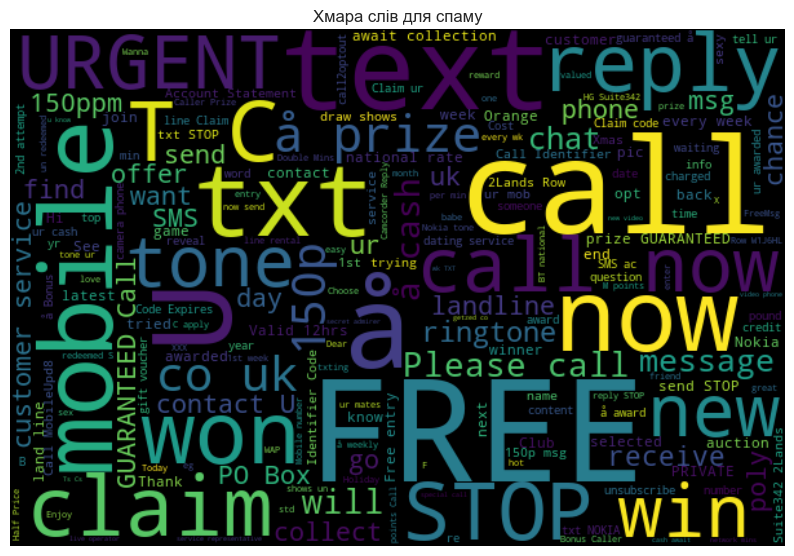

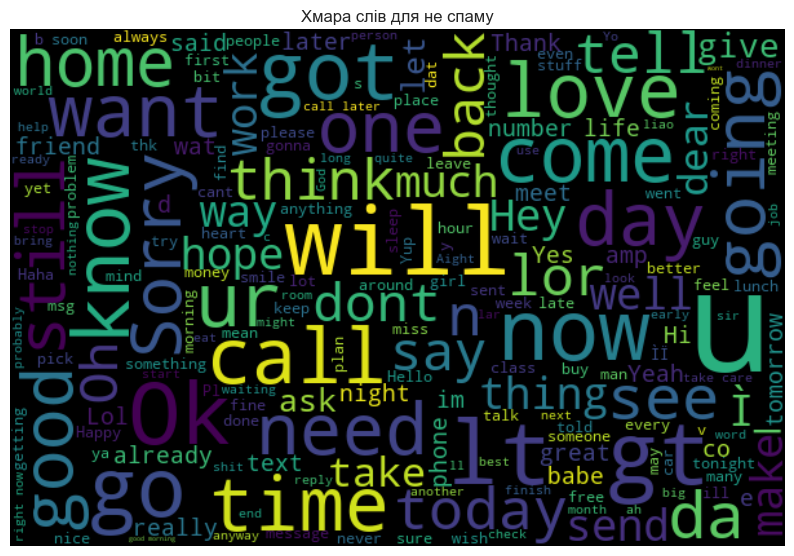

In [47]:
from wordcloud import WordCloud

# Об'єднання всіх спам-повідомлень в один рядок
spam_words = ' '.join(list(sms[sms['label'] == 'spam']['message']))

# Об'єднання всіх не спам-повідомлень в один рядок
ham_words = ' '.join(list(sms[sms['label'] == 'ham']['message']))

# Створення хмар слів для спаму
spam_wc = WordCloud(width=600, height=400, random_state=21, max_font_size=110).generate(spam_words)
plt.figure(figsize=(10, 8))
plt.imshow(spam_wc, interpolation="bilinear")
plt.axis('off')
plt.title('Хмара слів для спаму')
plt.show()

# Створення хмар слів для не спаму
ham_wc = WordCloud(width=600, height=400, random_state=21, max_font_size=110).generate(ham_words)
plt.figure(figsize=(10, 8))
plt.imshow(ham_wc, interpolation="bilinear")
plt.axis('off')
plt.title('Хмара слів для не спаму')
plt.show()


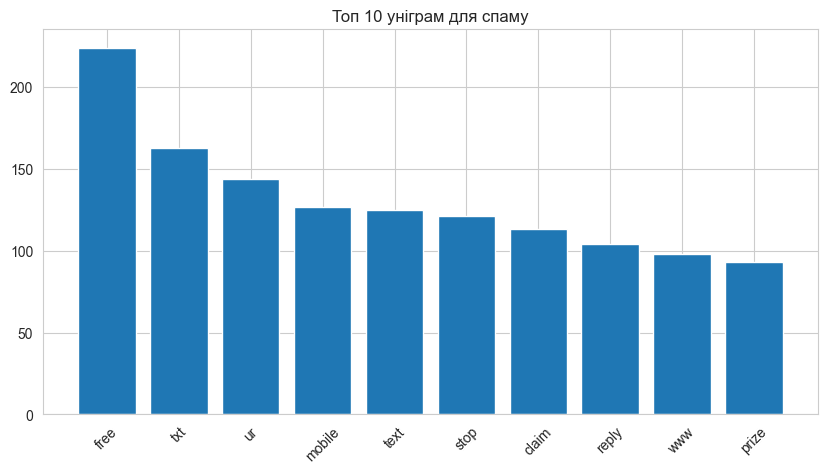

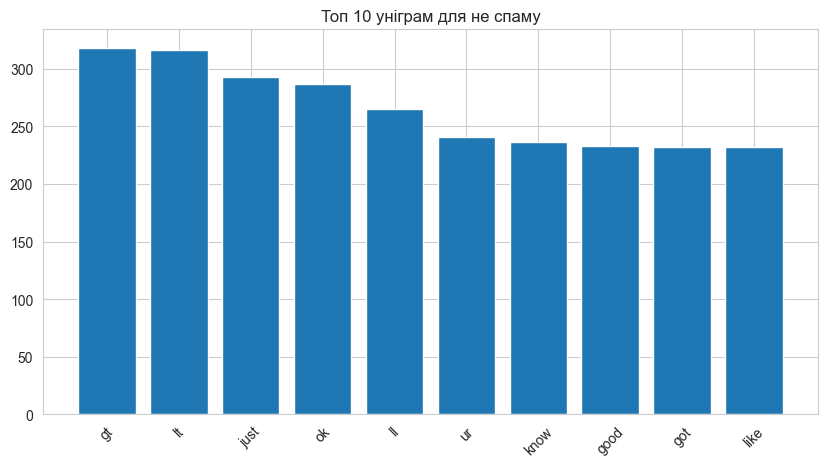

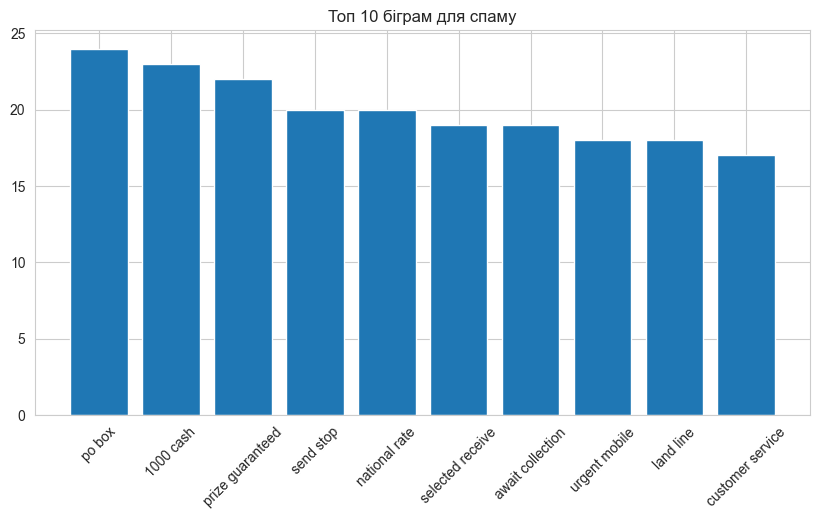

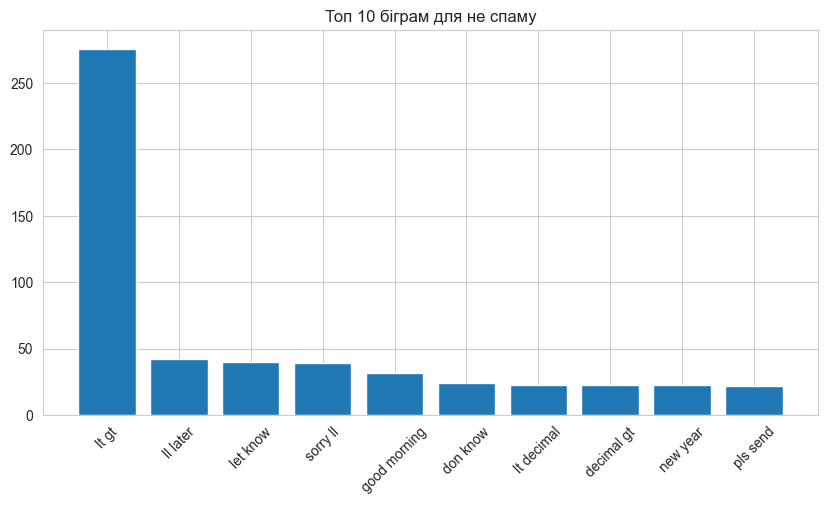

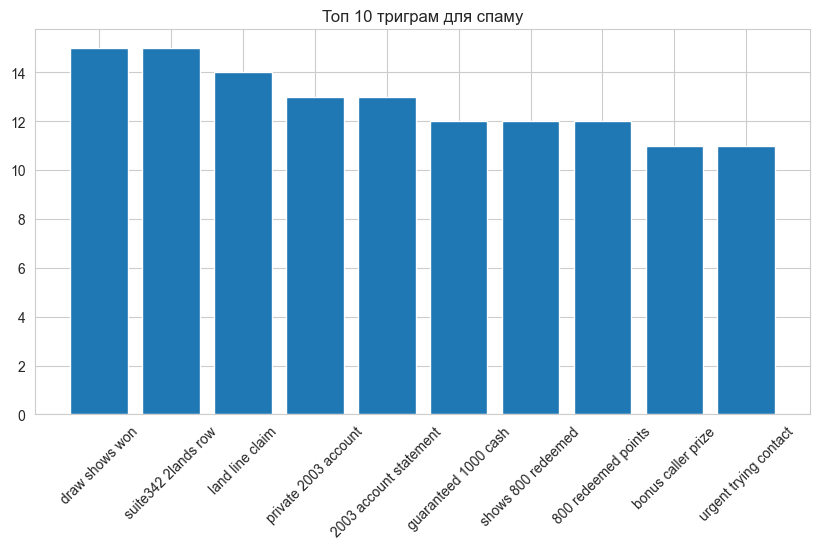

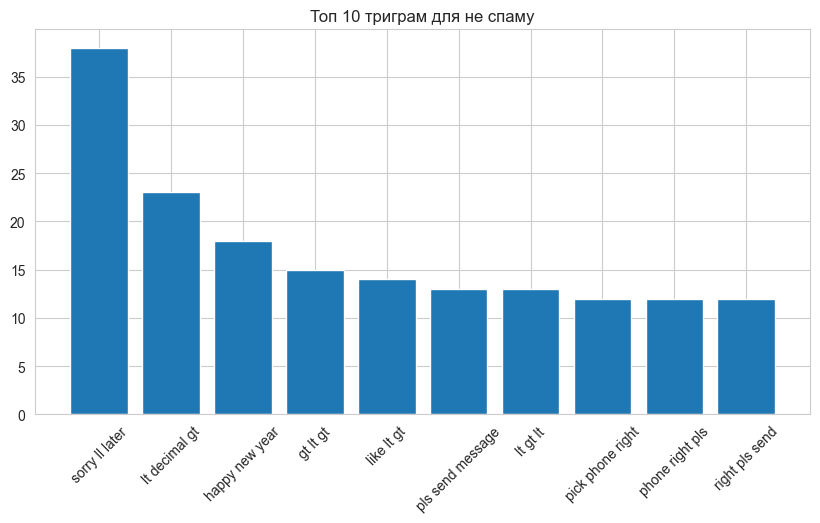

In [49]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_grams(corpus, n=None, ngram_range=(1, 1)):
    vec = CountVectorizer(ngram_range=ngram_range, stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

spam_unigrams = get_top_n_grams(sms[sms['label'] == 'spam']['message'], n=10, ngram_range=(1, 1))
spam_bigrams = get_top_n_grams(sms[sms['label'] == 'spam']['message'], n=10, ngram_range=(2, 2))
spam_trigrams = get_top_n_grams(sms[sms['label'] == 'spam']['message'], n=10, ngram_range=(3, 3))

ham_unigrams = get_top_n_grams(sms[sms['label'] == 'ham']['message'], n=10, ngram_range=(1, 1))
ham_bigrams = get_top_n_grams(sms[sms['label'] == 'ham']['message'], n=10, ngram_range=(2, 2))
ham_trigrams = get_top_n_grams(sms[sms['label'] == 'ham']['message'], n=10, ngram_range=(3, 3))

def plot_top_n_grams(ngrams, title):
    words, counts = zip(*ngrams)
    plt.figure(figsize=(10, 5))
    plt.bar(words, counts)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

# Візуалізація топ n-грам для спаму
plot_top_n_grams(spam_unigrams, 'Топ 10 уніграм для спаму')
plot_top_n_grams(spam_bigrams, 'Топ 10 біграм для спаму')
plot_top_n_grams(spam_trigrams, 'Топ 10 триграм для спаму')

# Візуалізація топ n-грам для не спаму
plot_top_n_grams(ham_unigrams, 'Топ 10 уніграм для не спаму')
plot_top_n_grams(ham_bigrams, 'Топ 10 біграм для не спаму')
plot_top_n_grams(ham_trigrams, 'Топ 10 триграм для не спаму')